# 8.3. Learning to recognize handwritten digits with a K-nearest neighbors classifier

In [3]:
import numpy as np
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.neighbors as nb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
digits = ds.load_digits()
X = digits.data
y = digits.target
print((X.min(), X.max()))
print(X.shape)

(0.0, 16.0)
(1797, 64)


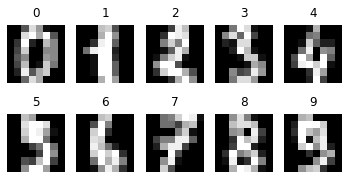

In [5]:
nrows, ncols = 2, 5
fig, axes = plt.subplots(nrows, ncols,
                         figsize=(6, 3))
for i in range(nrows):
    for j in range(ncols):
        # Image index
        k = j + i * ncols
        ax = axes[i, j]
        ax.matshow(digits.images[k, ...],
                   cmap=plt.cm.gray)
        ax.set_axis_off()
        ax.set_title(digits.target[k])

In [6]:
(X_train, X_test, y_train, y_test) = \
    ms.train_test_split(X, y, test_size=.25)

In [7]:
knc = nb.KNeighborsClassifier()

In [8]:
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
knc.score(X_test, y_test)

0.9911111111111112

In [16]:
# Let's draw a 1.
one = np.zeros((8, 8))
one[1:-1, 4] = 16  # The image values are in [0, 16].
one[2, 3] = 16

Text(0.5, 1.0, 'One')

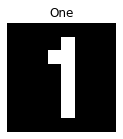

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
ax.imshow(one, interpolation='none',
          cmap=plt.cm.gray)
ax.grid(False)
ax.set_axis_off()
ax.set_title("One")

In [18]:
# We need to pass a (1, D) array.
knc.predict(one.reshape((1, -1)))

array([1])